In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import yfinance as yf
import datetime

In [3]:
AXISBANK = yf.download('axisbank.ns',start = '2012-1-1', end = '2017-1-1', index_col = 'Date', parse_dates=True)
HDFCBANK = yf.download('hdfcbank.ns',start = '2012-1-1', end = '2017-1-1', index_col = 'Date', parse_dates=True)
ICICIBANK = yf.download('icicibank.ns',start = '2012-1-1', end = '2017-1-1', index_col = 'Date', parse_dates=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
AXISBANK.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,162.000000,163.000000,156.800003,158.960007,148.441727,9727265
2012-01-03,161.020004,168.380005,160.729996,167.509995,156.425980,10710050
2012-01-04,168.960007,171.199997,166.380005,169.630005,158.405701,16936750
2012-01-05,169.800003,175.759995,169.009995,174.130005,162.607941,16901170
2012-01-06,172.559998,173.199997,167.259995,170.699997,159.404877,12345325


In [6]:
HDFCBANK.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,214.449997,214.899994,209.750000,213.425003,199.794937,3514998
2012-01-03,215.699997,220.449997,215.000000,219.574997,205.552139,3439238
2012-01-04,220.949997,222.475006,215.425003,221.649994,207.494644,4871478
2012-01-05,222.000000,223.350006,220.149994,221.824997,207.658463,3380606
2012-01-06,220.500000,228.574997,219.475006,226.649994,212.175323,3977222


In [7]:
ICICIBANK.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,125.481819,127.181816,124.563637,126.645454,110.398743,14927627
2012-01-03,128.181824,132.545456,128.181824,131.963638,115.034660,18500311
2012-01-04,133.345459,136.181824,132.800003,135.109085,117.776611,32952243
2012-01-05,135.454544,137.600006,134.363632,136.018188,118.569092,23203350
2012-01-06,134.909088,138.727264,132.363632,136.672729,119.139656,22273933


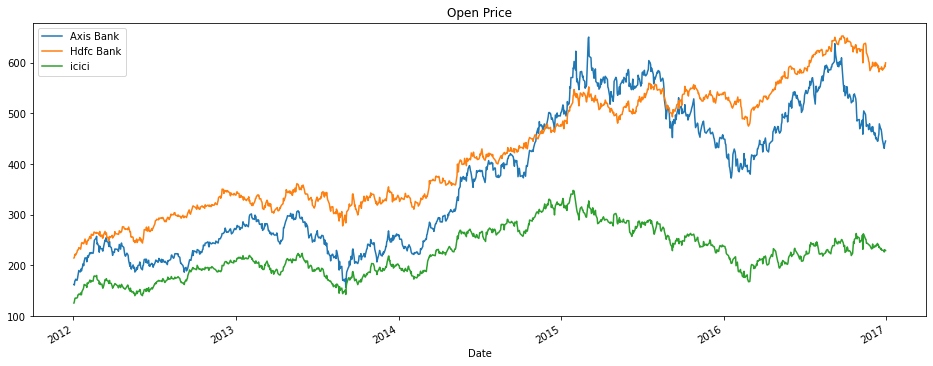

In [8]:
AXISBANK['Open'].plot(label='Axis Bank', figsize=(16,6),title = 'Open Price',)
HDFCBANK['Open'].plot(label='Hdfc Bank')
ICICIBANK['Open'].plot(label='icici')
plt.legend();

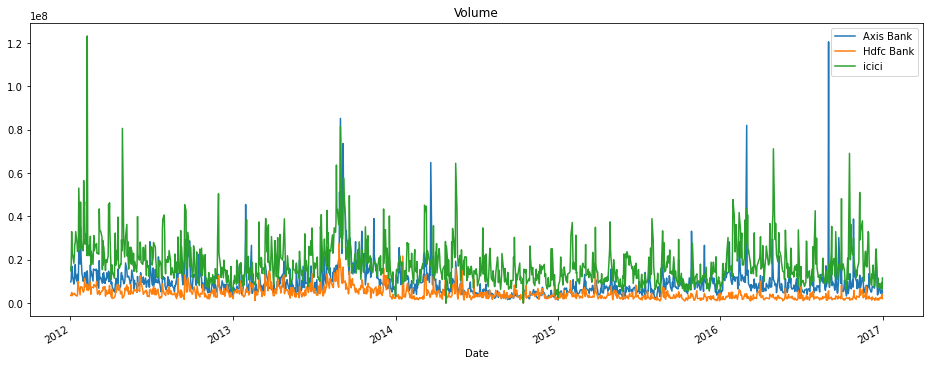

In [9]:
AXISBANK['Volume'].plot(label='Axis Bank', figsize=(16,6),title = 'Volume',)
HDFCBANK['Volume'].plot(label='Hdfc Bank')
ICICIBANK['Volume'].plot(label='icici')
plt.legend();

In [10]:
AXISBANK['Volume'].idxmax()

Timestamp('2016-08-31 00:00:00')

In [11]:
HDFCBANK['Volume'].idxmax()

Timestamp('2013-08-27 00:00:00')

In [12]:
ICICIBANK['Volume'].idxmax()

Timestamp('2012-02-08 00:00:00')

In [13]:
AXISBANK['Total Volume'] = AXISBANK['Open']*AXISBANK['Volume']
HDFCBANK['Total Volume'] = HDFCBANK['Open']*HDFCBANK['Volume']
ICICIBANK['Total Volume'] = ICICIBANK['Open']*ICICIBANK['Volume']

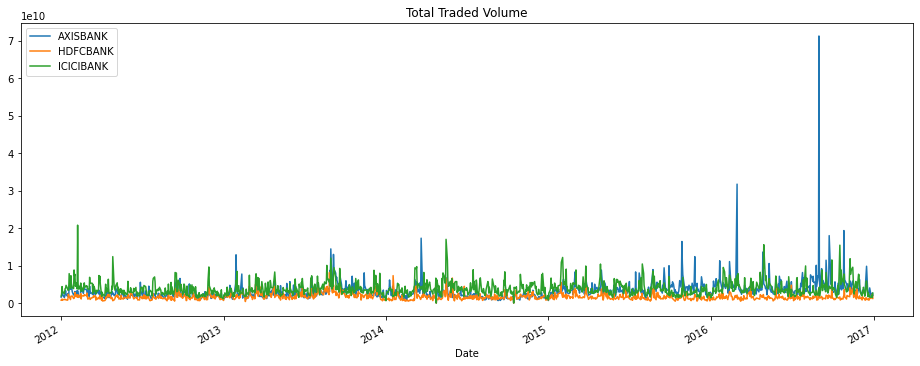

In [14]:
AXISBANK['Total Volume'].plot(label='AXISBANK', figsize=(16,6),title ='Total Traded Volume')
HDFCBANK['Total Volume'].plot(label='HDFCBANK')
ICICIBANK['Total Volume'].plot(label='ICICIBANK')
plt.legend();

In [15]:
AXISBANK['Total Volume'].idxmax()

Timestamp('2016-08-31 00:00:00')

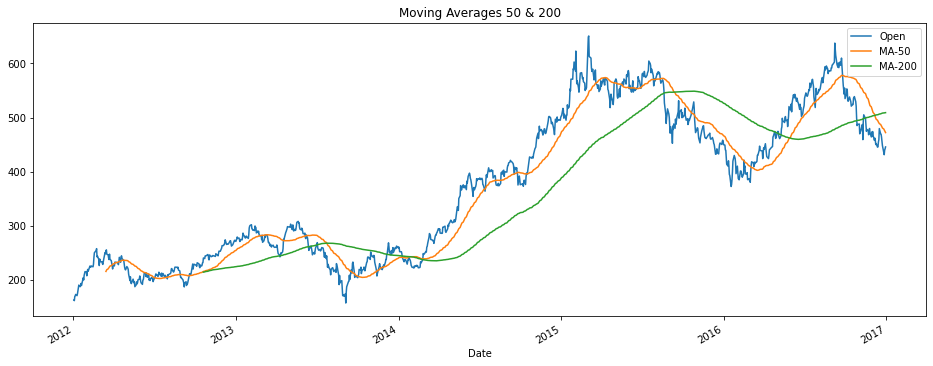

In [16]:
AXISBANK['Open'].plot(figsize=(16,6),title = 'Moving Averages 50 & 200')
AXISBANK['MA-50'] = AXISBANK['Close'].rolling(window=50).mean().plot(label = 'MA-50')
AXISBANK['MA-200'] = AXISBANK['Close'].rolling(window=200).mean().plot(label = 'MA-200')
plt.legend();

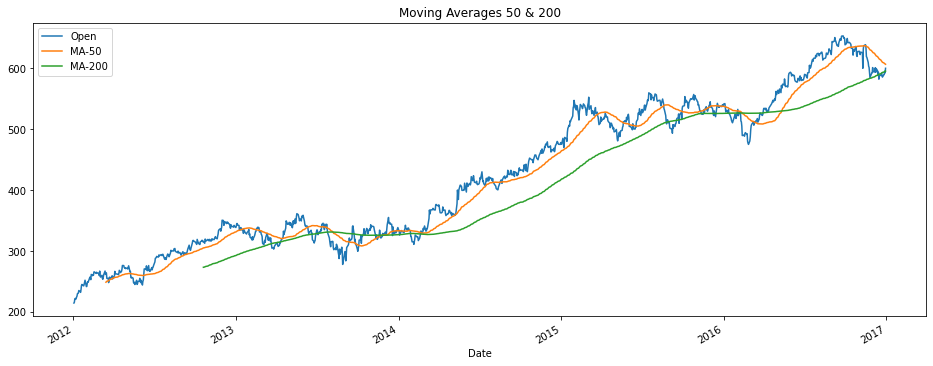

In [17]:
HDFCBANK['Open'].plot(figsize=(16,6),title = 'Moving Averages 50 & 200')
HDFCBANK['MA-50'] = HDFCBANK['Close'].rolling(window=50).mean().plot(label = 'MA-50')
HDFCBANK['MA-200'] = HDFCBANK['Close'].rolling(window=200).mean().plot(label = 'MA-200')
plt.legend();

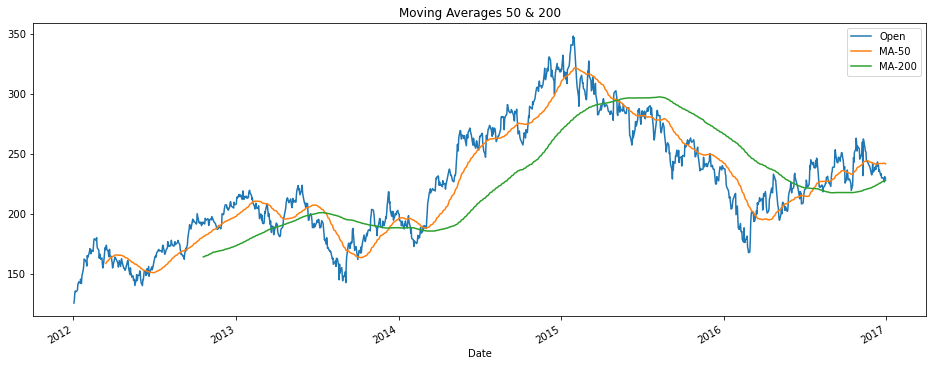

In [18]:
ICICIBANK['Open'].plot(figsize=(16,6),title = 'Moving Averages 50 & 200')
ICICIBANK['MA-50'] = ICICIBANK['Close'].rolling(window=50).mean().plot(label = 'MA-50')
ICICIBANK['MA-200'] = ICICIBANK['Close'].rolling(window=200).mean().plot(label = 'MA-200')
plt.legend();

In [19]:
from pandas.plotting import scatter_matrix
banks = pd.concat([AXISBANK['Open'],HDFCBANK['Open'],ICICIBANK['Open']],axis=1)

In [20]:
banks.head()

,Open,Open,Open
Date,,,
2012-01-02,162.000000,214.449997,125.481819
2012-01-03,161.020004,215.699997,128.181824
2012-01-04,168.960007,220.949997,133.345459
2012-01-05,169.800003,222.000000,135.454544
2012-01-06,172.559998,220.500000,134.909088


In [21]:
banks.columns = ['Axisbank','Hdfcbank','Icicibank']

In [22]:
banks.head()

,Axisbank,Hdfcbank,Icicibank
Date,,,
2012-01-02,162.000000,214.449997,125.481819
2012-01-03,161.020004,215.699997,128.181824
2012-01-04,168.960007,220.949997,133.345459
2012-01-05,169.800003,222.000000,135.454544
2012-01-06,172.559998,220.500000,134.909088


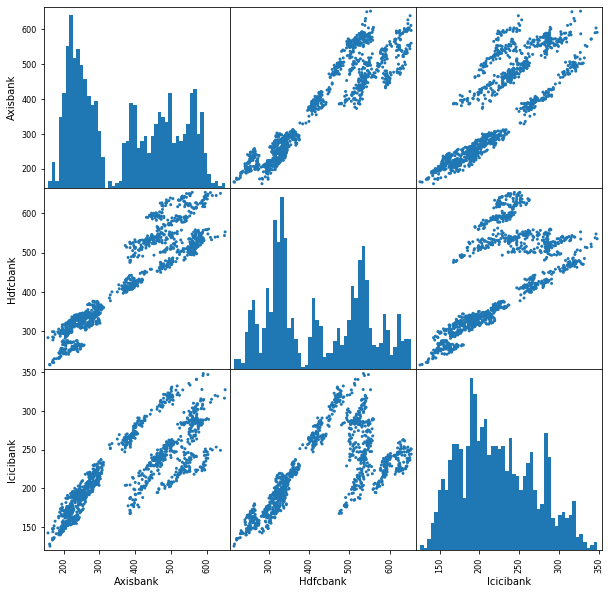

In [23]:
scatter_matrix(banks,figsize=(10,10),alpha=1,hist_kwds={'bins':50});

In [24]:
# Creating Candle Stick Charts
import mplfinance as mf

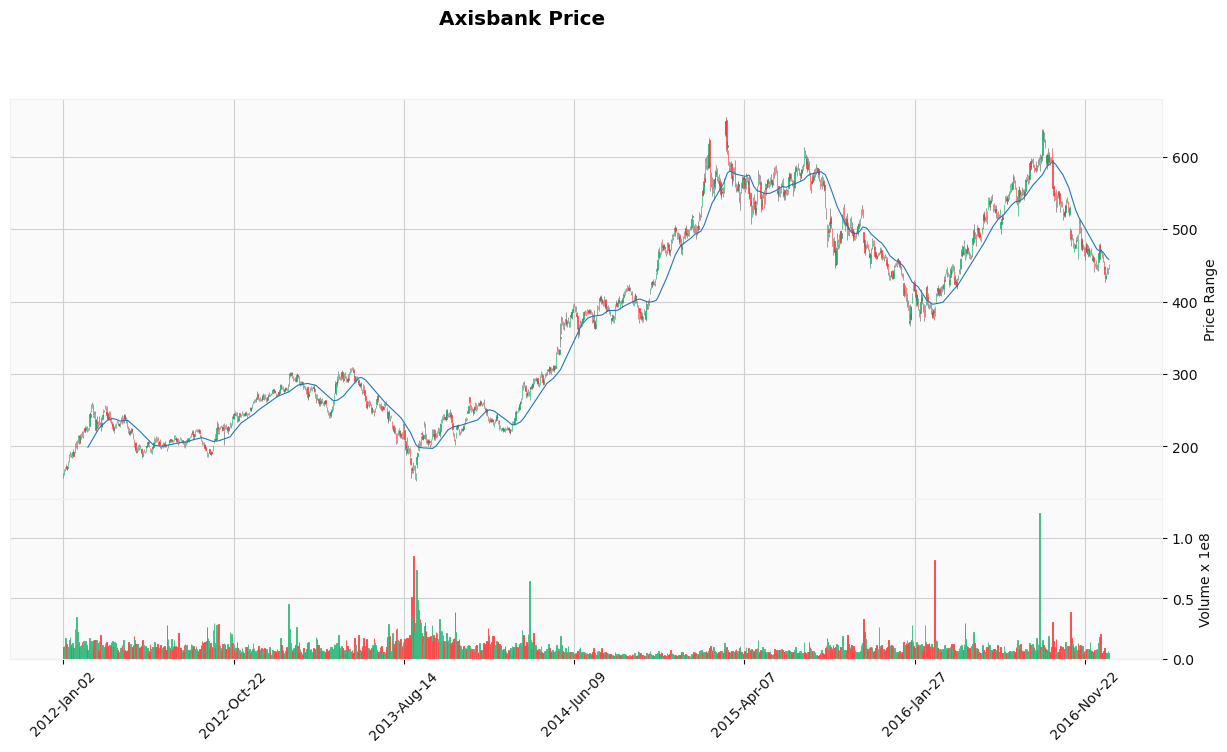

In [25]:
mf.plot(AXISBANK,
       type = 'candle',
       title = 'Axisbank Price',
       ylabel = 'Price Range',
       figsize = (16,8),
        style = 'yahoo',
       volume = True,
       mav = 30)

In [26]:
# Change in returns calculation

AXISBANK['Returns'] = AXISBANK['Close'].pct_change(1)
HDFCBANK['Returns'] = HDFCBANK['Close'].pct_change(1)
ICICIBANK['Returns'] = ICICIBANK['Close'].pct_change(1)

In [27]:
ICICIBANK['Returns']

Date
2012-01-02         NaN
2012-01-03    0.041993
2012-01-04    0.023836
2012-01-05    0.006729
2012-01-06    0.004812
                ...   
2016-12-26   -0.014691
2016-12-27    0.021761
2016-12-28   -0.007099
2016-12-29   -0.002582
2016-12-30    0.016726
Name: Returns, Length: 1229, dtype: float64

In [28]:
ICICIBANK.head()

,Open,High,Low,Close,Adj Close,Volume,Total Volume,MA-50,MA-200,Returns
Date,,,,,,,,,,
2012-01-02,125.481819,127.181816,124.563637,126.645454,110.398743,14927627,1.873146e+09,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)",NaN
2012-01-03,128.181824,132.545456,128.181824,131.963638,115.034660,18500311,2.371404e+09,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)",0.041993
2012-01-04,133.345459,136.181824,132.800003,135.109085,117.776611,32952243,4.394032e+09,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)",0.023836
2012-01-05,135.454544,137.600006,134.363632,136.018188,118.569092,23203350,3.142999e+09,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)",0.006729
2012-01-06,134.909088,138.727264,132.363632,136.672729,119.139656,22273933,3.004956e+09,"AxesSubplot(0.125,0.2;0.775x0.68)","AxesSubplot(0.125,0.2;0.775x0.68)",0.004812


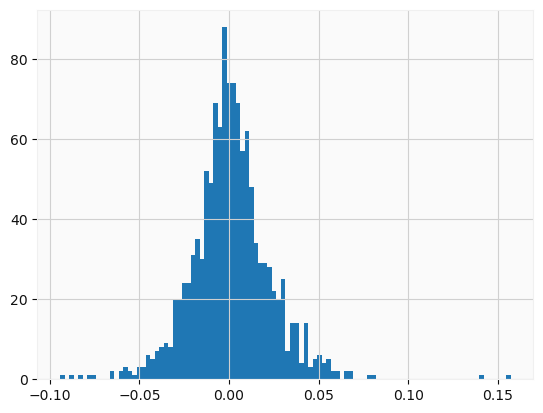

In [29]:
AXISBANK['Returns'].hist(bins=100);

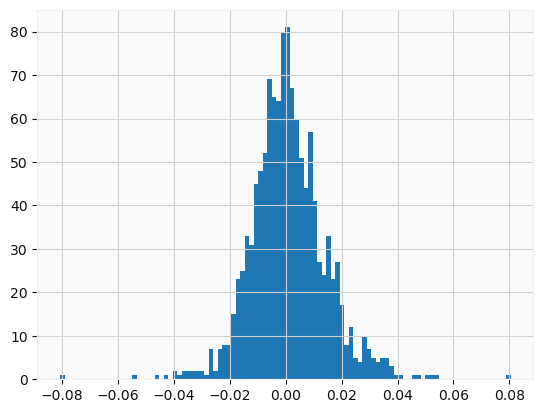

In [30]:
HDFCBANK['Returns'].hist(bins=100);

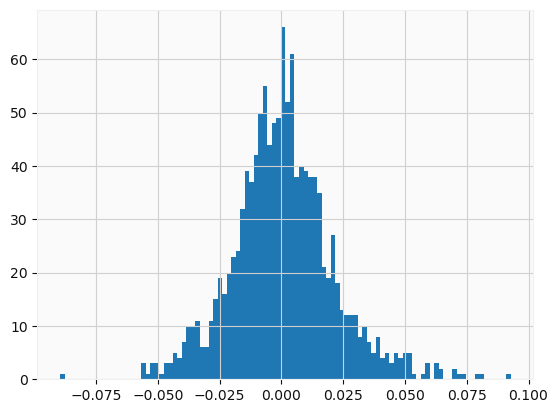

In [31]:
ICICIBANK['Returns'].hist(bins=100);

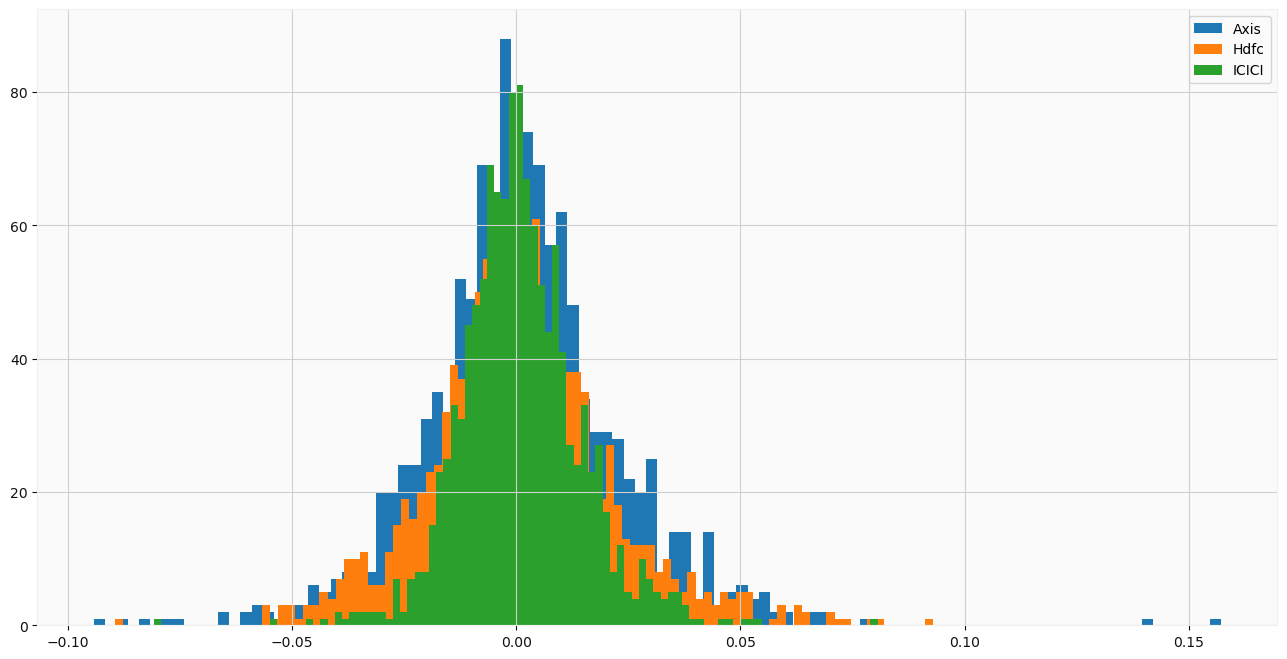

In [32]:
AXISBANK['Returns'].hist(bins=100,label = 'Axis',figsize=(16,8))
ICICIBANK['Returns'].hist(bins=100,label = 'Hdfc')
HDFCBANK['Returns'].hist(bins=100,label = 'ICICI');
plt.legend();

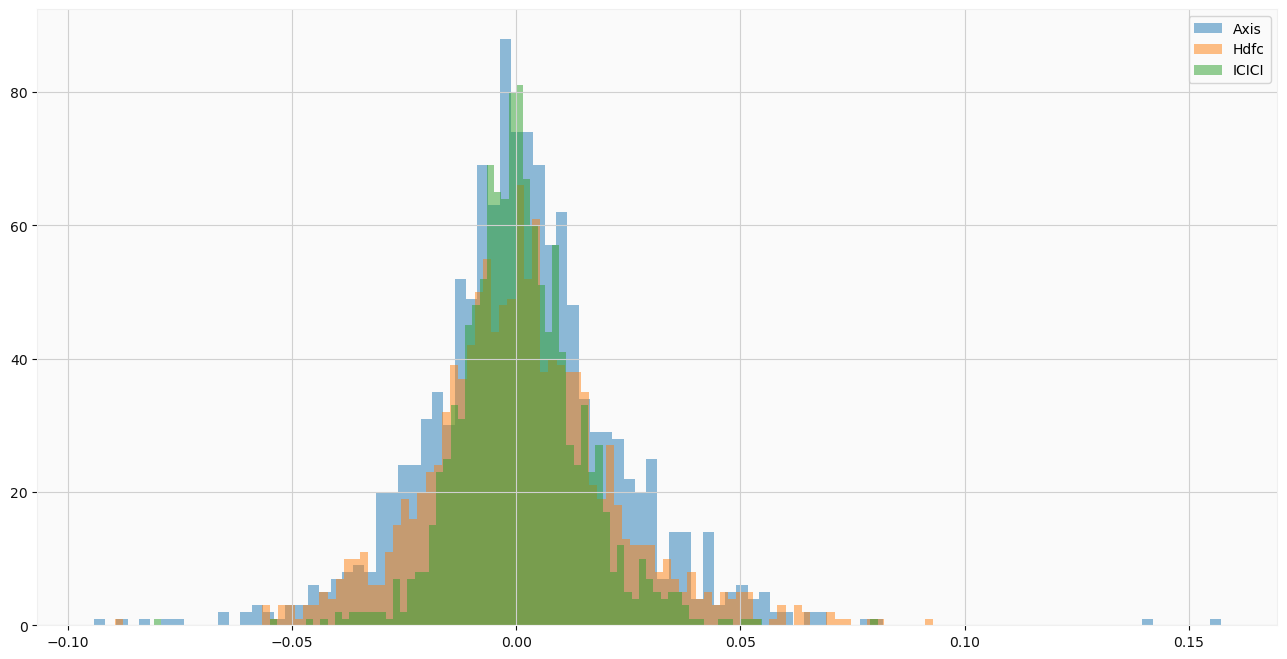

In [33]:
AXISBANK['Returns'].hist(bins=100,label = 'Axis',figsize=(16,8),alpha = 0.5)
ICICIBANK['Returns'].hist(bins=100,label = 'Hdfc',alpha = 0.5)
HDFCBANK['Returns'].hist(bins=100,label = 'ICICI', alpha = 0.5);
plt.legend();

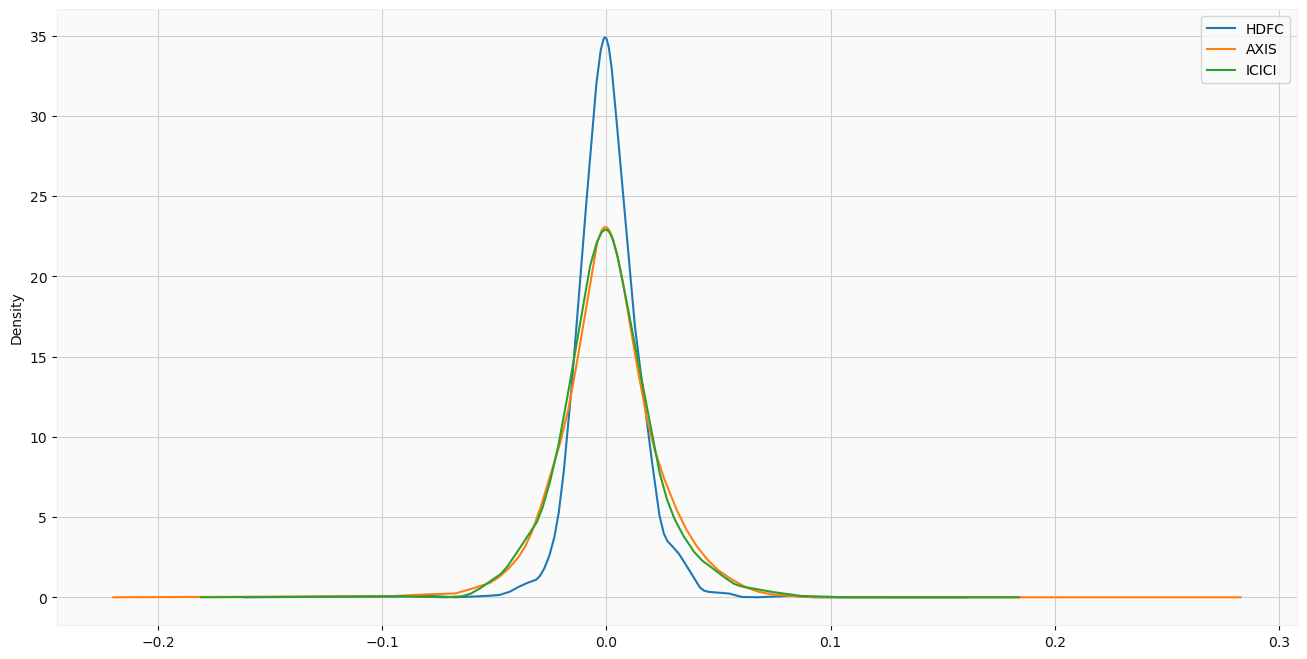

In [34]:
HDFCBANK['Returns'].plot(kind='kde',label ='HDFC',figsize = (16,8))
AXISBANK['Returns'].plot(kind='kde',label ='AXIS',figsize = (16,8))
ICICIBANK['Returns'].plot(kind='kde',label ='ICICI',figsize = (16,8))
plt.legend();

In [35]:
bank_returns = pd.concat([AXISBANK['Returns'],HDFCBANK['Returns'],ICICIBANK['Returns']],axis=1)
bank_returns.columns = ['Axis Ret','Hdfc Ret','Icici Ret']
bank_returns.head()

,Axis Ret,Hdfc Ret,Icici Ret
Date,,,
2012-01-02,NaN,NaN,NaN
2012-01-03,0.053787,0.028816,0.041993
2012-01-04,0.012656,0.009450,0.023836
2012-01-05,0.026528,0.000790,0.006729
2012-01-06,-0.019698,0.021751,0.004812


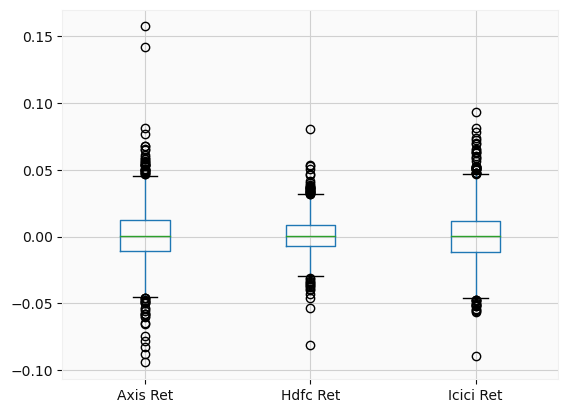

In [36]:
bank_returns.plot(kind='box');

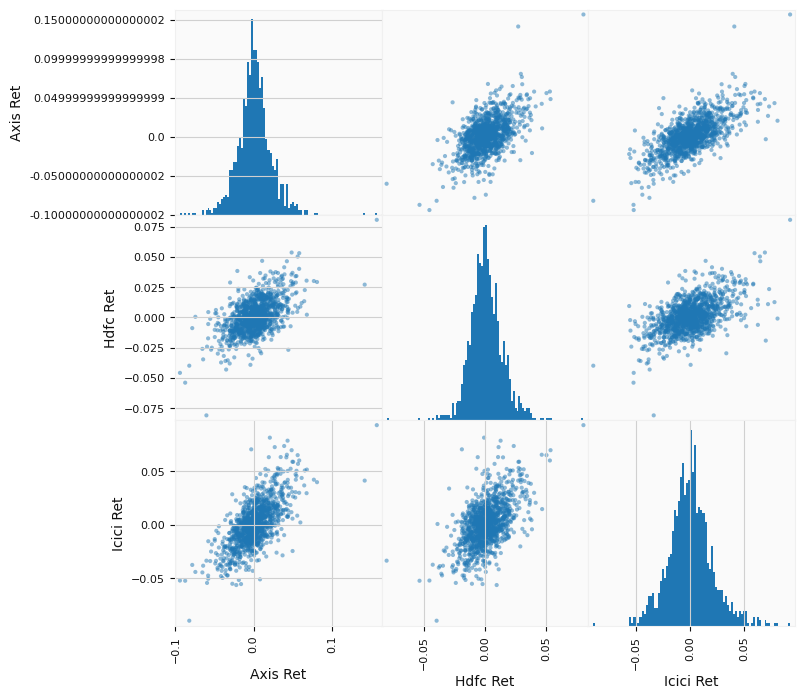

In [37]:
scatter_matrix(bank_returns,figsize=(8,8),hist_kwds={'bins':100});

In [38]:
# Calculating Cumulative returns

AXISBANK['Cum Returns'] = (1 + AXISBANK['Returns']).cumprod()
HDFCBANK['Cum Returns'] = (1 + HDFCBANK['Returns']).cumprod()
ICICIBANK['Cum Returns'] = (1 + ICICIBANK['Returns']).cumprod()

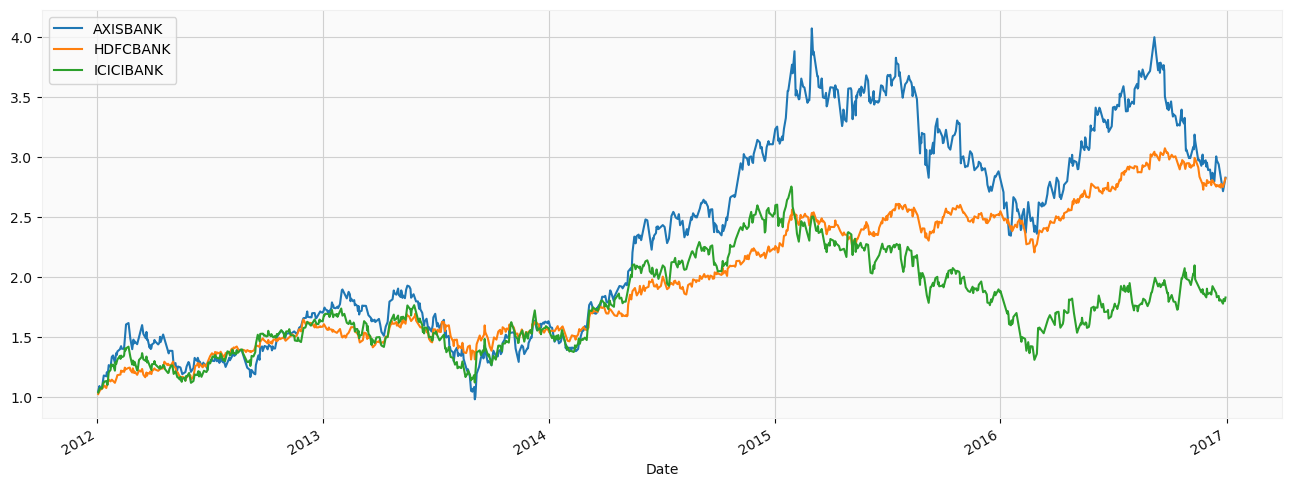

In [39]:
AXISBANK['Cum Returns'].plot(label='AXISBANK',figsize=(16,6))
HDFCBANK['Cum Returns'].plot(label='HDFCBANK',figsize=(16,6))
ICICIBANK['Cum Returns'].plot(label='ICICIBANK',figsize=(16,6))
plt.legend();